In [1]:
#간단한 회귀분석 예
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

info = pd.read_excel('/gdrive/My Drive/소프트웨어 이해와 활용/11주/2015_korean_data.xlsx')
info.head()

,성별,키,몸무게,목둘레,손길이,손너비,발길이,머리둘레
0,남,1736.0,72.1,385.0,177.0,82.0,228.0,575.0
1,남,1833.0,106.2,418.0,195.0,98.0,269.0,610.0
2,남,1744.0,69.1,400.0,186.0,83.0,244.0,613.0
3,남,1751.0,68.4,355.0,178.0,86.0,231.0,605.0
4,남,1851.0,81.9,394.0,190.0,83.0,265.0,580.0


In [4]:
#키와 몸무게 사이의 관계 분석
#남자 데이터 추출
is_male = info['성별'] == '남'
male_info = info[is_male]
#여자 데이터 추출
is_female = info['성별'] == '여'
female_info = info[is_female]

In [6]:
male_info.info()
female_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3196 entries, 0 to 4902
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      3196 non-null   object 
 1   키       3195 non-null   float64
 2   몸무게     3191 non-null   float64
 3   목둘레     3190 non-null   float64
 4   손길이     3193 non-null   float64
 5   손너비     3193 non-null   float64
 6   발길이     3192 non-null   float64
 7   머리둘레    3193 non-null   float64
dtypes: float64(7), object(1)
memory usage: 224.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3224 entries, 44 to 6419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      3224 non-null   object 
 1   키       3224 non-null   float64
 2   몸무게     3222 non-null   float64
 3   목둘레     3195 non-null   float64
 4   손길이     3224 non-null   float64
 5   손너비     3224 non-null   float64
 6   발길이     3224 non-null   float64
 7   머리둘레    3224 non-null   f

In [12]:
print(male_info.tail())
print(female_info.tail())

     성별       키   몸무게    목둘레    손길이   손너비    발길이   머리둘레
4898  남  1811.0  79.3  385.0  197.0  86.0  278.0  575.0
4899  남  1779.0  79.0  381.0  181.0  82.0  259.0  598.0
4900  남  1675.0  64.9  371.0  182.0  78.0  242.0  577.0
4901  남  1675.0  60.0  340.0  172.0  74.0  239.0  588.0
4902  남  1775.0  65.3  360.0  184.0  82.0  260.0  602.0
     성별       키   몸무게    목둘레    손길이   손너비    발길이   머리둘레
6415  여  1706.0  59.6  340.0  178.0  74.0  242.0  582.0
6416  여  1624.0  54.9  321.0  164.0  72.0  241.0  558.0
6417  여  1508.0  50.1  325.0  173.0  73.0  228.0  540.0
6418  여  1574.0  44.6  305.0  166.0  70.0  222.0  555.0
6419  여  1550.0  62.6  350.0  161.0  77.0  228.0  559.0


In [13]:
#데이터프레임 정보 확인-결측치 포함 여부 확인
male_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3196 entries, 0 to 4902
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      3196 non-null   object 
 1   키       3195 non-null   float64
 2   몸무게     3191 non-null   float64
 3   목둘레     3190 non-null   float64
 4   손길이     3193 non-null   float64
 5   손너비     3193 non-null   float64
 6   발길이     3192 non-null   float64
 7   머리둘레    3193 non-null   float64
dtypes: float64(7), object(1)
memory usage: 224.7+ KB


In [14]:
#결측치가 포함된 행 전체 삭제
male_info = male_info.dropna(axis=0)
male_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 0 to 4902
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      3186 non-null   object 
 1   키       3186 non-null   float64
 2   몸무게     3186 non-null   float64
 3   목둘레     3186 non-null   float64
 4   손길이     3186 non-null   float64
 5   손너비     3186 non-null   float64
 6   발길이     3186 non-null   float64
 7   머리둘레    3186 non-null   float64
dtypes: float64(7), object(1)
memory usage: 224.0+ KB


In [15]:
female_info = female_info.dropna(axis=0)
female_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 105 to 6419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      3193 non-null   object 
 1   키       3193 non-null   float64
 2   몸무게     3193 non-null   float64
 3   목둘레     3193 non-null   float64
 4   손길이     3193 non-null   float64
 5   손너비     3193 non-null   float64
 6   발길이     3193 non-null   float64
 7   머리둘레    3193 non-null   float64
dtypes: float64(7), object(1)
memory usage: 224.5+ KB


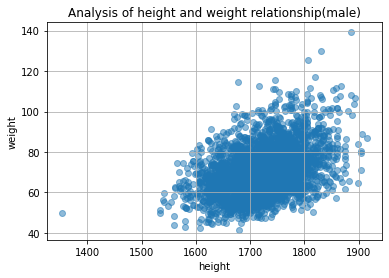

In [17]:
#남자와 키와 몸무게 사이의 관계 분석
x = male_info['키']
y = male_info['몸무게']
plt.scatter(x, y, alpha=0.5)
plt.title("Analysis of height and weight relationship(male)")
plt.xlabel("height")
plt.ylabel("weight")
plt.grid()
plt.show()

In [18]:
#선형회귀식 추정
#1. 남자 키와 몸무게 사이의 회귀분석
from sklearn.linear_model import LinearRegression
fitter = LinearRegression()
fitter.fit(x.values.reshape(-1,1), y)
b1 = fitter.coef_
b0 = fitter.intercept_
print(b1, b0)

[0.0796305] -66.19545068698483


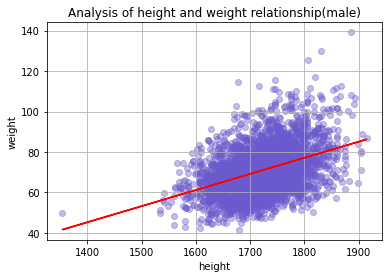

In [40]:
#2.남자의 키와 몸무게 사이의 회귀분석 결과의 시각화
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
info = pd.read_excel('/gdrive/My Drive/소프트웨어 이해와 활용/11주/2015_korean_data.xlsx')

is_male = info['성별'] == '남'
male_info = info[is_male]
male_info = male_info.dropna(axis=0)

x = male_info['키']
y = male_info['몸무게']
fitter = LinearRegression()
fitter.fit(x.values.reshape(-1,1), y) #직선 추정
y_h = fitter.predict(x.values.reshape(-1,1)) #추정된 직선의 방적식
plt.scatter(x, y, color='slateblue', alpha=0.4) #산점도 그리기
plt.plot(x, y_h, color='red')
plt.title("Analysis of height and weight relationship(male)")
plt.xlabel("height")
plt.ylabel("weight")
plt.grid()
plt.show()

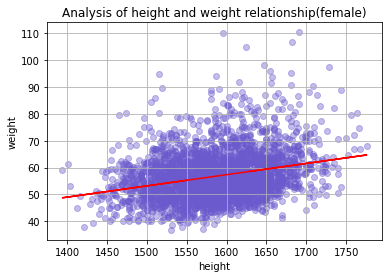

In [27]:
#과제1
#여자의 키와 몸무게 사이의 선형회귀분석을 실시하고 그 결과를 시각화 하시오
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
info = pd.read_excel('/gdrive/My Drive/소프트웨어 이해와 활용/11주/2015_korean_data.xlsx')

is_female = info['성별'] == '여'
female_info = info[is_female]
female_info = female_info.dropna(axis=0)

x = female_info['키']
y = female_info['몸무게']
fitter = LinearRegression()
fitter.fit(x.values.reshape(-1,1), y) #직선 추정
y_h = fitter.predict(x.values.reshape(-1,1)) #추정된 직선의 방적식
plt.scatter(x, y, color='slateblue', alpha=0.4) #산점도 그리기
plt.plot(x, y_h, color='red')
plt.title("Analysis of height and weight relationship(female)")
plt.xlabel("height")
plt.ylabel("weight")
plt.grid()
plt.show()

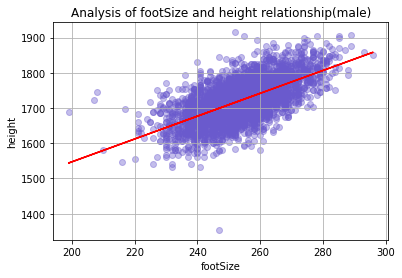

In [39]:
#과제 2
#흔히 발이 크면 키도 크다는 속설이 있습니다. 남자 데이터프레임을 이용하여 발 길이(독립변수,x)와 키(종속변수, y)사이의 회귀분석을 시행하고 그결과를 시각화 하시오
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
info = pd.read_excel('/gdrive/My Drive/소프트웨어 이해와 활용/11주/2015_korean_data.xlsx')

is_male = info['성별'] == '남'
male_info = info[is_male]
male_info = male_info.dropna(axis=0)

x = male_info['발길이']
y = male_info['키']
fitter = LinearRegression()
fitter.fit(x.values.reshape(-1,1), y) #직선 추정
y_h = fitter.predict(x.values.reshape(-1,1)) #추정된 직선의 방적식
plt.scatter(x, y, color='slateblue', alpha=0.4) #산점도 그리기
plt.plot(x, y_h, color='red')
plt.title("Analysis of footSize and height relationship(male)")
plt.xlabel("footSize")
plt.ylabel("height")
plt.grid()
plt.show()

In [41]:
#sklearn 라이브러리를 이용한 결정 계수 계산
from sklearn.metrics import r2_score
r2 = r2_score(male_info['몸무게'], y_h)
r2

0.1613731761331172

In [43]:
#yi의 추정치 계산
f = np.polyfit(male_info['키'], male_info['몸무게'],1)
f = np.poly1d(f)
x = np.array(male_info['키']) # y - f(x)
exp_8 = np.mean(male_info['몸무게'])
SST = np.sum((male_info['몸무게'] - exp_8)**2)
SSR = np.sum((f(x) - exp_8)**2)
R2 = SSR / SST 
R2

0.16137317613311758

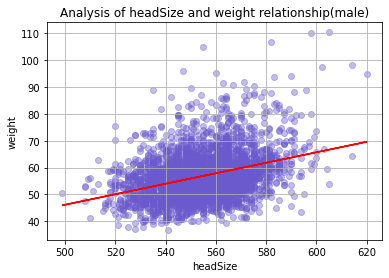

In [48]:
#머리 크기와 몸무게 사이의 회귀분석 및 검증 - 여자데이터 이용
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
info = pd.read_excel('/gdrive/My Drive/소프트웨어 이해와 활용/11주/2015_korean_data.xlsx')

is_female = info['성별'] == '여'
female_info = info[is_female]
female_info = female_info.dropna(axis=0)

x = female_info['머리둘레']
y = female_info['몸무게']
fitter = LinearRegression()
fitter.fit(x.values.reshape(-1,1), y) #직선 추정
y_h = fitter.predict(x.values.reshape(-1,1)) #추정된 직선의 방적식
plt.scatter(x, y, color='slateblue', alpha=0.4) #산점도 그리기
plt.plot(x, y_h, color='red')
plt.title("Analysis of headSize and weight relationship(male)")
plt.xlabel("headSize")
plt.ylabel("weight")
plt.grid()
plt.show()

In [45]:
#결정계수를 이용한 회귀분석 결과 검증
r2 = r2_score(female_info['몸무게'], y_h)
r2

0.11981438698325941

In [49]:
f = np.polyfit(x, y,1)
f = np.poly1d(f)

#exp_8 = np.mean(male_info['몸무게'])
SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((f(x) - np.mean(y))**2)
R2 = SSR / SST 
R2

0.11981438698325955